In [ ]:
import torch
import numpy as np
from PIL import Image
import shutil
import os
os.chdir('../')
from cxas.segmentor import CXAS
import pandas as pd


In [ ]:
model = CXAS(
    model_name = 'UNet_ResNet50_default',
    gpus       = '0'
)

# Extract Features

A list of all extractable features is provided [here](ChestXRayAnatomySegmentation/docs/available_features).

GDCMImageIO (0x55a979322580): Converting from MONOCHROME1 to MONOCHROME2 may impact the meaning of DICOM attributes related to pixel values.



0.522077922077922


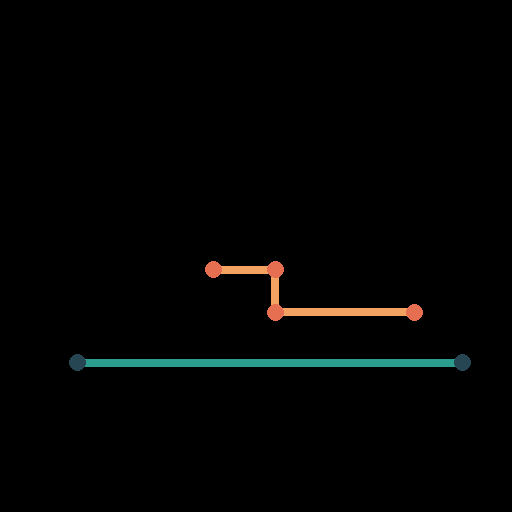

In [ ]:
path = 'images/126_IM-0176-2002.dcm'

features = model.extract_features_for_file(
    filename = path,
    feat_to_extract = 'CTR',
    draw = True,
)
print(features['score'])
features['drawing']


GDCMImageIO (0x557cbe1e61e0): Converting from MONOCHROME1 to MONOCHROME2 may impact the meaning of DICOM attributes related to pixel values.



The SCD for this image is: 22.990530139085948


/homes/constantin/.conda/envs/bidlord/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/homes/constantin/.conda/envs/bidlord/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


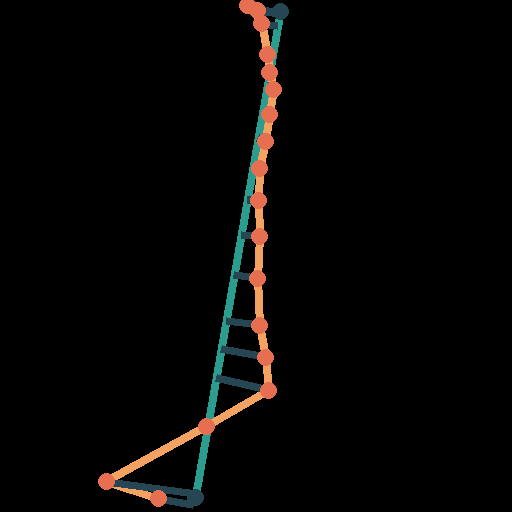

In [ ]:
path = 'images/126_IM-0176-2002.dcm'

features = model.extract_features_for_file(
    filename = path,
    feat_to_extract = 'SCD',
    draw = True,
)
print('The SCD'features['score'])
features['drawing']


# Extract Features for folder

In [4]:
input_path = './images'
out_path = './out_feats/'

model.extract_features_for_folder(
    input_directory_name = input_path,  
    output_directory = out_path,
    feat_to_extract = 'CTR',
    create = True, 
)

pd.read_csv('./out_feats/images.csv')

 20%|███████████████████████████████████████████████                                                                                                                                                                                            | 1/5 [00:00<00:01,  2.46it/s]WARNING: In /tmp/SimpleITK-build/ITK/Modules/IO/GDCM/src/itkGDCMImageIO.cxx, line 359
GDCMImageIO (0x55d32b99ac30): Converting from MONOCHROME1 to MONOCHROME2 may impact the meaning of DICOM attributes related to pixel values.

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.87it/s]


,Unnamed: 0,score,filename
0,0,0.406040,./images/00003440_000.png
1,1,0.517815,./images/cardiomegaly_failure_706_05379.png
2,2,0.522078,./images/126_IM-0176-2002.dcm
3,3,0.406040,./images/00003440_000.jpg
4,4,-1.000000,./images/CXAS_logo.png
